In [1]:
# Importing libraries
from quake.utils.utils import load_runcard
from pathlib import Path
from quake.models.qsvm.qsvm_tester import get_features, make_kernels, SvmsComparison
from quake.models.qsvm import quantum_featuremaps
from qiskit.circuit import ParameterVector
from qiskit import Aer

2022-05-17 19:11:16.648262: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Getting feature distributions from cnn or attention
data_folder = Path('../../output/tmp/data')
train_folder = Path('../../output/tmp/models/svm')
setup = load_runcard("../../output/tmp/cards/runcard.yaml")
dataset, labels = get_features(data_folder, train_folder, 'cnn', setup)

[INFO] (quake.cnn) Loading splitting maps from folder: ../../output/tmp/models/cnn
INFO:quake.cnn:Loading splitting maps from folder: ../../output/tmp/models/cnn
[INFO] (quake.cnn) Train dataset balancing: 14678 training points, of which 47.53% positives
INFO:quake.cnn:Train dataset balancing: 14678 training points, of which 47.53% positives
[INFO] (quake.cnn) Validation dataset balancing: 3145 training points, of which 47.82% positives
INFO:quake.cnn:Validation dataset balancing: 3145 training points, of which 47.82% positives
[INFO] (quake.cnn) Test dataset balancing: 3146 training points, of which 48.16% positives
INFO:quake.cnn:Test dataset balancing: 3146 training points, of which 48.16% positives
[INFO] (quake.cnn) Loading weights at ../../output/tmp/models/cnn/cnn.h5
INFO:quake.cnn:Loading weights at ../../output/tmp/models/cnn/cnn.h5


27/27 [==============================] - 1s 19ms/step


In [3]:
qubits = dataset[-1].shape[-1]
x = ParameterVector('x', length=qubits)
backend = Aer.get_backend('statevector_simulator')

zf = quantum_featuremaps.z_featuremap(x, qubits,1)
zzf = quantum_featuremaps.zz_featuremap(x, qubits, 1)
c1 = quantum_featuremaps.custom1_featuremap(x, qubits, 1)
c2 = quantum_featuremaps.custom2_featuremap(x, qubits, 1)

quantum_kernels = make_kernels([zf, zzf, c1, c2], backend)

In [4]:
# Inputs for the comparer class
settings = {
    'x': x,
    'quantum_featuremaps': [zf, zzf, c1, c2],
    'quantum_instance': backend,
    'quantum_kernels': quantum_kernels,
    'kernel_names':  ['Z', 'ZZ', 'Custom1', 'Custom2'],
    'cs': [10, 1000, 1000, 100],
    'training_size': [20, 30, 50],
    'val_size': 50,
    'test_size': 50,
    'folds': 5,
    'folder_name': 'Output_Folder',
    'backend': backend,
}   

Plotting the dataset


<Figure size 3600x7200 with 0 Axes>

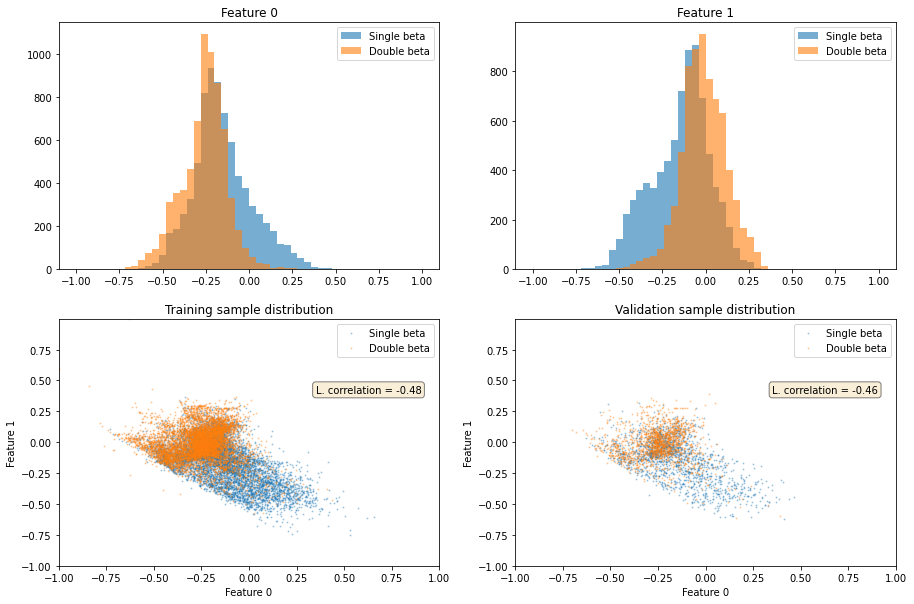

In [5]:
# Initialization
comparer = SvmsComparison(**settings)

# Plotting feature distributions
comparer.plot_data(dataset, labels)

Starting the session
Training subset 0 with 20 samples.
Training subset 1 with 20 samples.
Training subset 2 with 20 samples.
Training subset 3 with 20 samples.
Training subset 4 with 20 samples.
Training subset 0 with 30 samples.
Training subset 1 with 30 samples.
Training subset 2 with 30 samples.
Training subset 3 with 30 samples.
Training subset 4 with 30 samples.
Training subset 0 with 50 samples.
Training subset 1 with 50 samples.
Training subset 2 with 50 samples.
Training subset 3 with 50 samples.
Training subset 4 with 50 samples.
Plotting the learning curves


<Figure size 3600x7200 with 0 Axes>

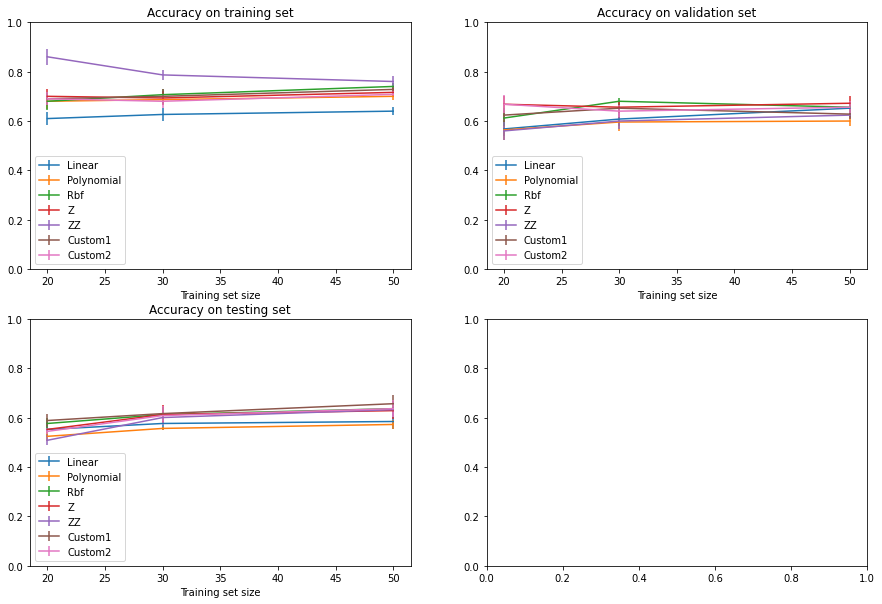

In [6]:
# Training models and getting scores
comparer.train_svms(dataset, labels)

# Plotting the learning curves
comparer.learning_curves()

In [7]:
# Saving the decision boundaries in the output folder 
# Set cheap_version to False for better, time consuming, plots.
comparer.plot_decision_boundaries(cheap_version = True)

Plotting decision boundaries


Plotting Bloch spheres


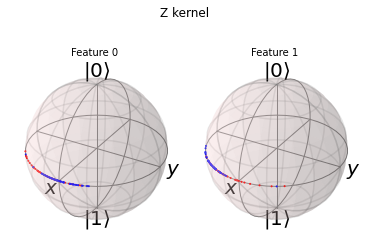

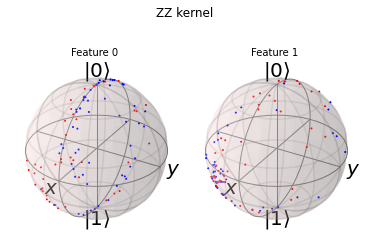

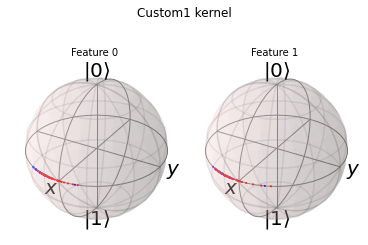

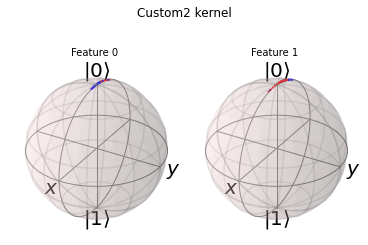

In [8]:
# Plotting Bloch spheres representation
comparer.plot_bloch_spheres(dataset, labels)

Plotting kernel matrices


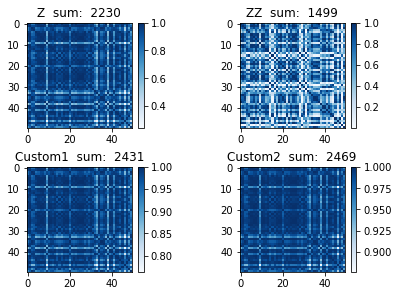

In [9]:
# Plotting kernel matrices
comparer.plot_kernels()

Doing cross validated trainings


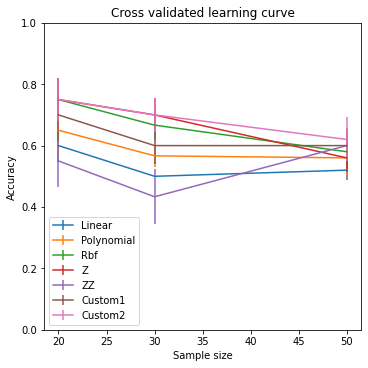

In [10]:
# Training the svms for computing the cross validated accuracy (only on training set)
comparer.train_svms_cv(dataset, labels)

In [11]:
# Saving data into the output folder
comparer.save(settings)

Saving data in ../../Output_Folder


In [14]:
# Loding data into another class
copy = SvmsComparison(**settings)
copy.load_files(comparer.path)

Loading data from ../../Output_Folder


In [15]:
dir(copy)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'alignment',
 'backend',
 'cs',
 'do_kernel_alignment',
 'folds',
 'kernels',
 'learning_curves',
 'load_files',
 'make_folder',
 'path',
 'plot_bloch_spheres',
 'plot_data',
 'plot_decision_boundaries',
 'plot_featuremaps',
 'plot_kernels',
 'quantum_featuremaps',
 'quantum_instance',
 'quantum_kernels',
 'save',
 'svms',
 'test',
 'test_preds',
 'test_size',
 'titles',
 'train',
 'train_preds',
 'train_svms',
 'train_svms_cv',
 'training_size',
 'val_size',
 'validation',
 'validation_preds',
 'x']